# Titanic surviving classification project

## Import necessary libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix

## Load the dataset

In [22]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.select_dtypes(include='object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

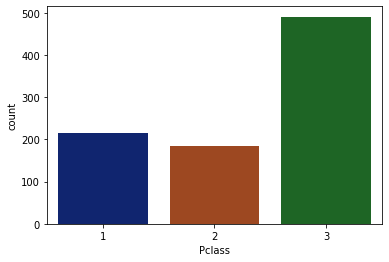

In [26]:

sns.countplot(x='Pclass',data=df, palette='dark')
plt.show()

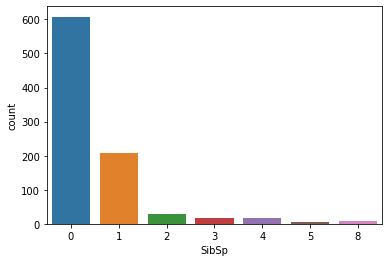

In [27]:
sns.countplot(x='SibSp',data=df)
plt.show()

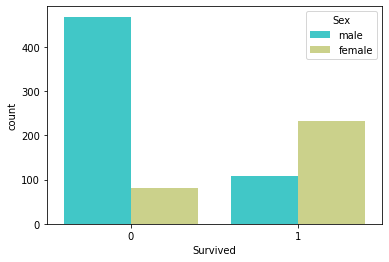

In [28]:
sns.countplot(x='Survived',hue='Sex',data=df, palette='rainbow')
plt.show()

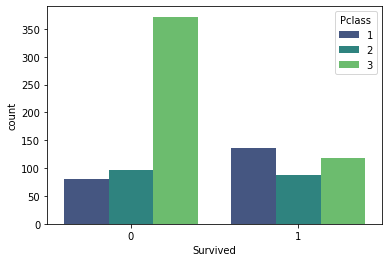

In [29]:
sns.countplot(x='Survived',hue='Pclass',data=df, palette='viridis')
plt.show()

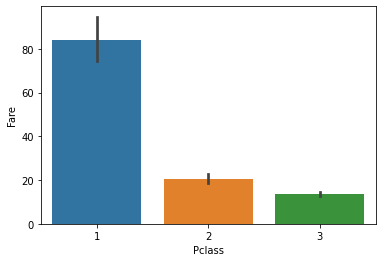

In [30]:
sns.barplot(x='Pclass',y='Fare',data=df)
plt.show()

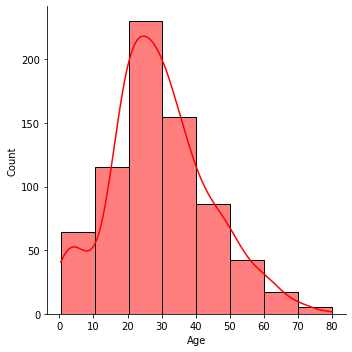

In [31]:
sns.displot(df['Age'],kde=True,color='red',bins=8)
plt.show()

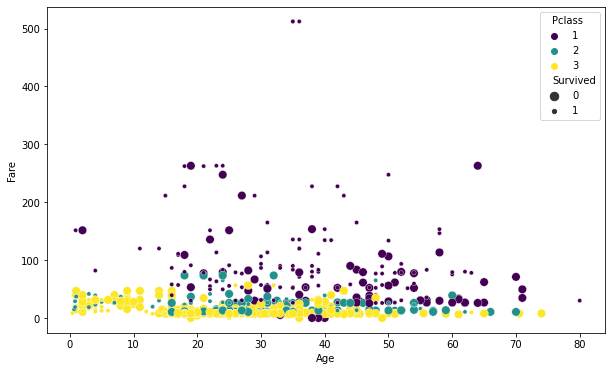

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',data=df,hue='Pclass',size='Survived',palette='viridis')
plt.show()

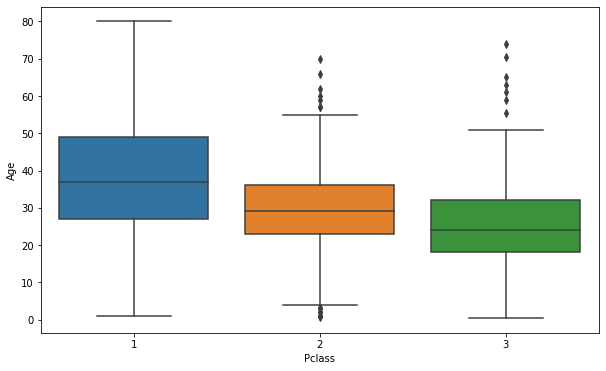

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

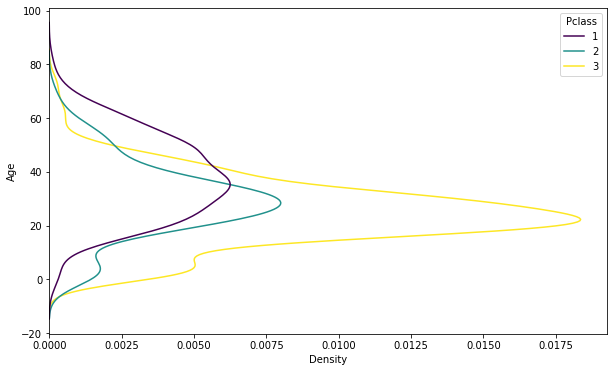

In [34]:
plt.figure(figsize=(10,6))
sns.kdeplot(y='Age',data=df,hue='Pclass',palette='viridis')
plt.show()

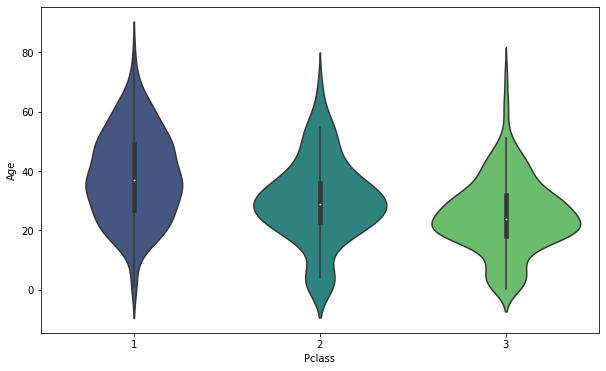

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Pclass',y='Age',data=df, palette='viridis')
plt.show()

## Data cleaning

In [36]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [37]:
df['Age'].fillna(df['Age'].mean(), inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [38]:
df.dropna(axis=0,how="any",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


## Feature engineering

In [39]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [40]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Q
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
889,1,1,0,26.0,0,0,30.0000,C


In [41]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [42]:
#One hot encoding
embarked_dummies = pd.get_dummies(df['Embarked'],drop_first=False)
embarked_dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [43]:
df = pd.concat([df,embarked_dummies],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Q,0,1,0
886,0,2,0,27.0,0,0,13.0000,S,0,0,1
887,1,1,1,19.0,0,0,30.0000,S,0,0,1
889,1,1,0,26.0,0,0,30.0000,C,1,0,0


In [44]:
df = df.drop('Embarked',axis=1)

## Data correlation

In [45]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,0.195673,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.279194,0.131989,0.197831
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,0.103611,0.027256,-0.109078
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.038268,-0.021693,-0.025431
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,-0.046227,0.051331,0.018968
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.009523,-0.009417,0.013259
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,0.301337,-0.062346,-0.250994
C,0.195673,-0.279194,0.103611,0.038268,-0.046227,-0.009523,0.301337,1.000000,-0.095623,-0.884986
Q,-0.048966,0.131989,0.027256,-0.021693,0.051331,-0.009417,-0.062346,-0.095623,1.000000,-0.378859
S,-0.159015,0.197831,-0.109078,-0.025431,0.018968,0.013259,-0.250994,-0.884986,-0.378859,1.000000


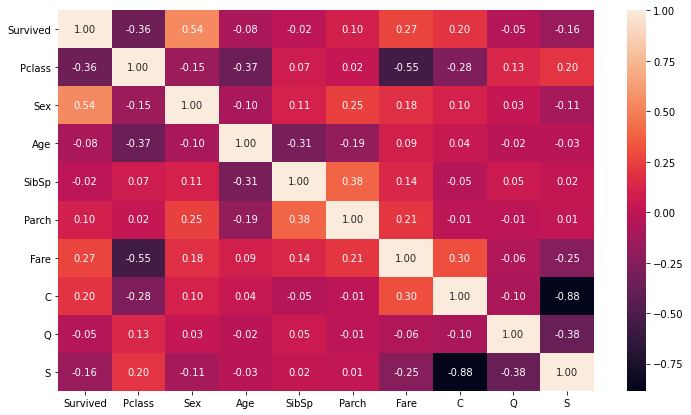

In [46]:
plt.figure(figsize= (12,7))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [47]:
df.corr()[['Survived']].sort_values('Survived',ascending=False)

,Survived
Survived,1.000000
Sex,0.536762
Fare,0.266100
C,0.195673
Parch,0.095265
SibSp,-0.015523
Q,-0.048966
Age,-0.082446
S,-0.159015
Pclass,-0.356462


## Prepare train and test data

In [48]:
X = df.drop(['Survived'],axis=1).to_numpy()
y = df['Survived'].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("start: ",X.shape, y.shape)
print("train: ",X_train.shape, y_train.shape)
print("test: ",X_test.shape, y_test.shape)
df

start:  (712, 9) (712,)
train:  (569, 9) (569,)
test:  (143, 9) (143,)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,0,1,0
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [49]:
print('Max: ' ,X_train.max())
print('Min: ',X_train.min())

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
print('Max: ' ,X_train.max())
print('Min: ',X_train.min())

Max:  512.3292
Min:  0.0
Max:  1.0
Min:  0.0


## Training and evaluation

### KNN

In [50]:
for k in range(3,10,2):
  knn1 = KNeighborsClassifier(n_neighbors=k)
  knn1.fit(X_train,y_train)
  print("k = {} score test: {}".format(k,knn1.score(X_test,y_test)))

k = 3 score test: 0.7622377622377622
k = 5 score test: 0.7412587412587412
k = 7 score test: 0.7832167832167832
k = 9 score test: 0.7762237762237763


In [51]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.7832167832167832

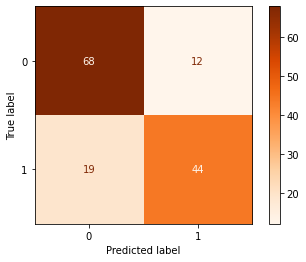

In [52]:
plot_confusion_matrix(knn1, X_test, y_test, values_format="d",cmap='Oranges')
plt.show()

In [53]:
pred1 = knn1.predict(X_test)
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

           0     0.7816    0.8500    0.8144        80
           1     0.7857    0.6984    0.7395        63

    accuracy                         0.7832       143
   macro avg     0.7837    0.7742    0.7769       143
weighted avg     0.7834    0.7832    0.7814       143



### SVM

In [54]:
for kernel in ['linear','poly','rbf']:
  svm2 = SVC(kernel=kernel,C=100)
  svm2.fit(X_train,y_train)
  print("kernal: {} score: {}", kernel,svm2.score(X_test,y_test))

kernal: {} score: {} linear 0.7482517482517482
kernal: {} score: {} poly 0.7832167832167832
kernal: {} score: {} rbf 0.7692307692307693


In [55]:
svm2 = SVC(kernel='poly', C=100)
svm2.fit(X_train, y_train)
svm2.score(X_test,y_test)

0.7832167832167832

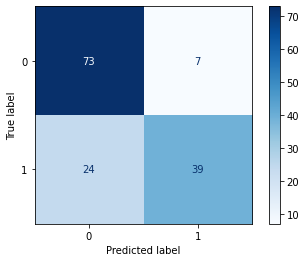

In [56]:
plot_confusion_matrix(svm2, X_test, y_test, values_format="d",cmap='Blues')
plt.show()

In [57]:
pred2=svm2.predict(X_test)
print(classification_report(y_test,pred2,digits=4))

              precision    recall  f1-score   support

           0     0.7526    0.9125    0.8249        80
           1     0.8478    0.6190    0.7156        63

    accuracy                         0.7832       143
   macro avg     0.8002    0.7658    0.7702       143
weighted avg     0.7945    0.7832    0.7767       143



### Logistic regression

In [61]:
clf = LogisticRegression(random_state=0,max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7972027972027972

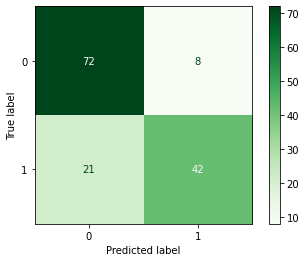

In [62]:
plot_confusion_matrix(clf, X_test, y_test, values_format="d",cmap='Greens')
plt.show()

In [63]:
pred3 = clf.predict(X_test)
print(classification_report(y_test,pred3,digits=4))

              precision    recall  f1-score   support

           0     0.7742    0.9000    0.8324        80
           1     0.8400    0.6667    0.7434        63

    accuracy                         0.7972       143
   macro avg     0.8071    0.7833    0.7879       143
weighted avg     0.8032    0.7972    0.7932       143

